In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import numba as nb
import scipy.interpolate as spip
from time import process_time

# from interpolate import cubic_spline
from new_interp import spline_numba as cubic_spline

In [4]:
@nb.njit
def is_sorted(a):
    for i in range(a.size-1):
        if a[i+1] < a[i] :
            return False
    return True

@nb.njit(fastmath = True)
def compute_interp(f, x, sorted=False):
    if sorted:
        return f(x)
    else:
        if is_sorted(x):
            return f(x)
        else:
            y = x.argsort()
            z = f(x[y])
            i = np.empty_like(y)
            i[y] = np.arange(y.size)
            return z[i]

In [3]:
for _ in range(1000):
    N = np.random.randint(1000, 10000000)
    print(N)
    X_values = np.random.random(N)
    X_values.sort()
    if not np.all(np.diff(X_values) > 0): continue
    Y_values = np.random.random(N)
    # Y_values = np.sin(X_values)

    t1 = process_time()
    scipy_interp = spip.CubicSpline(X_values, Y_values, bc_type="natural")
    t2 = process_time()
    # my_interp, a, b, c, d = cubic_spline(X_values, Y_values)
    my_interp = cubic_spline(X_values, Y_values)
    t3 = process_time()

    # spip_coeffs = scipy_interp.c.T
    # my_coeffs = np.stack((d, c, b, a), axis=-1)
    test_size = np.random.randint(10000, 100000000)
    X_values_test = np.random.uniform(
        size=test_size,
        low=X_values[0],
        high=X_values[-1],
    )
    # X_values_test.sort()
    # X_values_test = np.linspace(X_values[0], X_values[-1], 50000, dtype = np.float64)

    t4 = process_time()
    Y_values_spip = scipy_interp(X_values_test)
    t5 = process_time()
    # Y_values_new = compute_interp(my_interp, X_values_test, sorted=True)
    Y_values_new = my_interp(X_values_test)
    t6 = process_time()

    max_diff = np.max(np.abs(Y_values_spip - Y_values_new))
    
    with open("interp.csv", "a") as f:
        f.write(f"{N},{test_size},{t2-t1:.3e},{t3-t2:.3e},{t5-t4:.3e},{t6-t5:.3e},{max_diff:.3e}\n")


3029277
8490677
9885131
3776573
9719943
9167881
9808386
8568034
282286
8487675
4756516
4648925
1914893
7357859
3417918
2139708
3319246
235497
3275197
5653616
8133731
2308018
6009553
3091574
2350468
6392796
9467754
1218349
5018780
17120
1676996
5459437
7589196
3145898
9670789
8395206
8712269
1594459
9541695
3530764
4848231
8906074
9912547
549983
5214943
6829372
3929288
5492361
6769521
3578049
2367858
4950788
2262906
2908814
5676947
6425985
390166
598396
1592216
1989513
426407
2434062
581893
1484659
1100055
4681487
5572231
5820071
8280559
1599302
5064604
4931167
5135579
8965670
5875274
7037517
3444361
1683664
6238391
4426509
4130310
1169972
9463554
5683304
717784
2520248
4333781
9350760
8655466
9616606
5236181
634847
1624060
3955178
2193315
9835645
2126277
6066220
8871940
2391722
8941847
4417940
310202
6744538
9298926
4612326
9514098
2645042
8051167
2367280
3693765
111026
4396098
7034515
700533
3376983
8648847
7359105
338009
7029648
6593858
3074270
392983
9727642
8968028
6648218
1052042


ValueError: `x` must be strictly increasing sequence.

In [12]:
create_interp_data = np.genfromtxt("./create_interp.csv", delimiter=',')


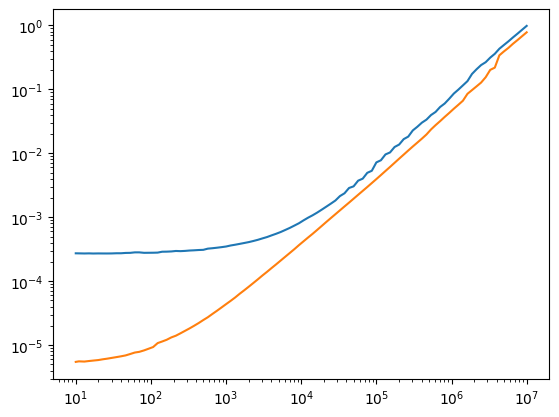

In [11]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(create_interp_data[:, 0], create_interp_data[:, 1])
plt.plot(create_interp_data[:, 0], create_interp_data[:, 2])

plt.xscale("log")
plt.yscale("log")

plt.show()

In [13]:
test_interp_data = np.genfromtxt("./test_interp.csv", delimiter=',')


10.0 657.0
40.0 869.0
162.0 1000.0
657.0 1321.0
10722.0 1000.0
43287.0 200923.0
174752.0 5336.0
705480.0 18738.0
2848035.0 18738.0


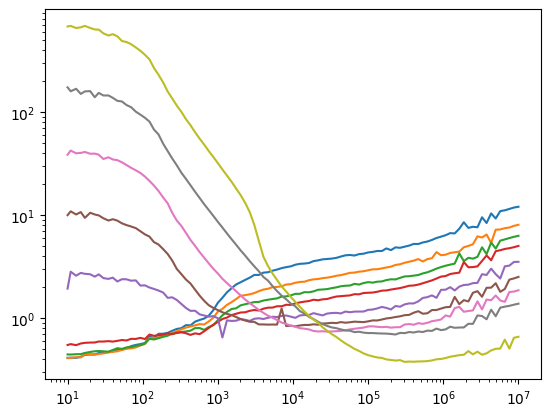

In [53]:
Ns = np.unique(test_interp_data[:,0])

plt.figure()

for N in Ns[0:-1:10]:
    if N == 2656: continue
    N_data = test_interp_data[np.where(test_interp_data[:, 0] == N)]
    ratio = N_data[:, 3] / N_data[:, 2]
    closest_to_1_idx = np.argmin(np.abs(ratio - 1))
    M_closest_to_1 = N_data[closest_to_1_idx, 1]
    plt.plot(N_data[:, 1], ratio, label=f"{N}")

    print(N, M_closest_to_1)

    

    # if x < 1: x = 1 / x
    # plt.scatter(N, x)

    # print(np.log10(N_data[closest_to_1_idx, 1]) / np.log10(N))
    
plt.xscale("log")
plt.yscale("log")

# plt.legend()

plt.show()

In [54]:
from new_interp import searchsorted_merge

In [62]:
x = np.random.rand(10000)
x.sort()
y = np.random.rand(10000)

%timeit searchsorted_merge(x, y, True)

1.01 ms ± 726 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
